In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from glob import glob
import numpy as np
from configs import *
import matplotlib.pyplot as plt
import cv2
import sys
from scipy.ndimage import gaussian_filter as blur
import math

In [3]:
meshDir = '_meshes'
procDir = '_procd'

In [4]:
from utils import *

parsev('# asdf 1 2 3 4')

([1.0, 2.0, 3.0, 4.0], 'asdf')

In [5]:
mname = '_meshes/07147-100250_strip_o64_s20_253.obj'
verts, faces, regs = load_markup(mname)
writeobj('dump.obj', verts, faces)

In [6]:
from configs import *
from utils import *

# print(CocoPairsRender)
markupfiles = sorted(glob('_meshes/*.obj'))
framefiles = sorted(
    glob('_captures/*.jpg'), 
    key=lambda ent: int(ent.split(sep)[1][6:-4]))
# print(framefiles[:10])
# print('Active meshes:', active_meshes)

# for ii, fname in enumerate(framefiles):

#     print()
#     print(kpts)

In [7]:
from annotate import *
from utils import *

In [8]:
from configs import *

In [9]:
fname = framefiles[35]
fhash = fname.split(sep)[-1][:-4]
# status = '[%d/%d : %s]' % (ii+1, len(framefiles), fhash)
status = '[%d/%d : %s]' % (1, len(framefiles), fhash)
joints, tris = find_joints(status, fhash, markupfiles)

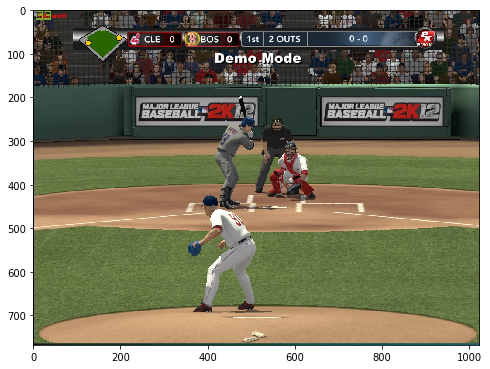

In [10]:
show_capture(fhash)

In [11]:
draw_joints(fhash, 'joints', joints)

In [12]:
draw_triangles(fhash, 'mask', tris.people)

0.9957593909247091 0.8028195329483253


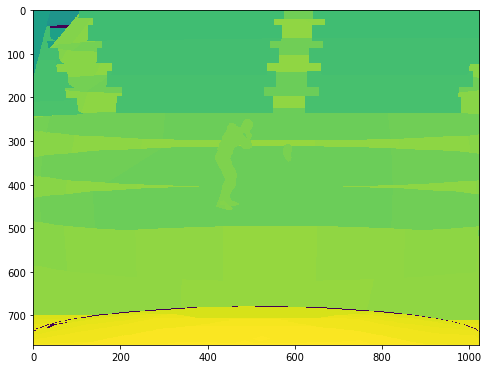

In [44]:
canvas = np.zeros((768, 1024)).astype(np.uint8)

view = tris.all
inds = [ei for ei, entry in enumerate(view) if entry['zdepth'] <= 1 and entry['zdepth'] >=0.8]
zs = [view[ii]['zdepth'] for ii in inds]
zmin, zmax = min(zs), max(zs)
print(zmax, zmin)
    
for ii in inds:
    entry = view[ii]
    zd = entry['zdepth']
    zd -= zmin
    zd /= (zmax - zmin)
    pts = entry['triangle'].reshape((-1,1,2)).astype(np.int32)
    
    cr = (1-zd) * 0.75 + 0.25
    cv2.fillPoly(canvas,[pts], 255 * cr)

# canvas[canvas == 0] = np.min(canvas[canvas > 0])
plt.figure(figsize=(8, 8))    
plt.imshow(canvas)
plt.show(); plt.close()
# cv2.imwrite('_outputs/%s_%s.png' % (fhash, tag), canvas)

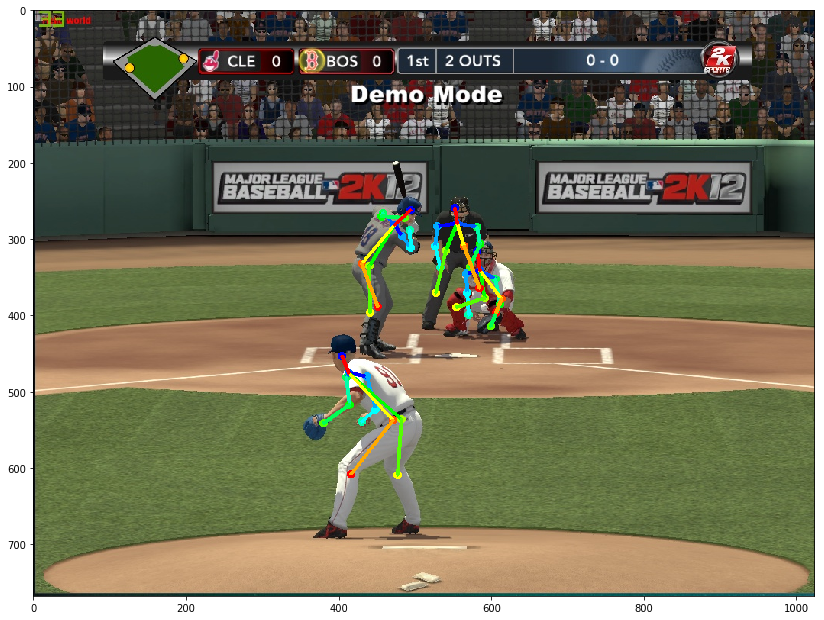

In [29]:
img = draw_skeletons(fhash, joints)
plt.figure(figsize=(14, 14))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show(); plt.close()
# break

In [12]:
writeobj('_outputs/project.obj', fmesh.verts, fmesh.faces, component='project')
writeobj('_outputs/world.obj', fmesh.verts, fmesh.faces)

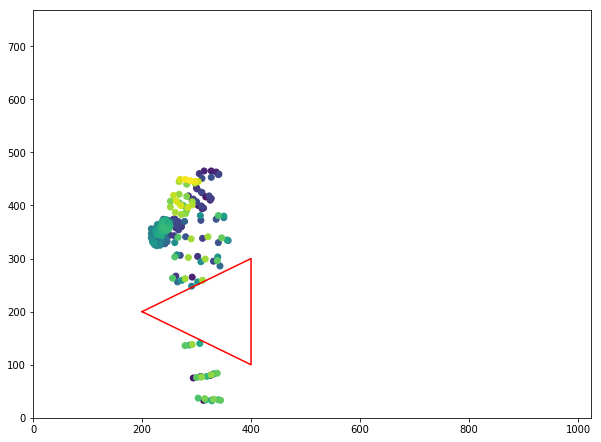

In [87]:
from utils import *

imsize = (768, 1024)

masktri = [[200, 400, 400], [200, 300, 100]]
testtri = [np.array(ent) for ent in zip(*masktri)], [2.0] * 3


pnts = []
zcomp = []
for vert in fmesh.verts[:250]:
    xx, yy, zz, _ = vert['project']
    sy = cpos(imsize[0], yy)
    sx = cpos(imsize[1], xx)
    
    if PointInTriangle(np.array([sx, sy]), *testtri[0]):
        continue
    
    pnts.append((sx, sy))
    zcomp.append(zz)

# print(max(zcomp), min(zcomp))
zcomp = np.array(zcomp)
zcomp -= min(zcomp)
zcomp /= max(zcomp)
xlist, ylist = zip(*pnts)

zind = np.argsort(zcomp)
xlist = [xlist[ind] for ind in zind]
ylist = [ylist[ind] for ind in zind]
zcomp = np.sort(zcomp)

plt.figure(figsize=(10, 10 * imsize[0]/imsize[1]))
plt.scatter(xlist, ylist, c=255 * zcomp)
plt.plot(masktri[0] + [masktri[0][0]], masktri[1] + [masktri[1][0]], c='red')
plt.xlim(0, imsize[1])
plt.ylim(0, imsize[0])
plt.show();plt.close()